In [1]:
import numpy as np
import scipy
import scipy.spatial
from scipy.spatial.distance import squareform,pdist,cdist
import matplotlib.pyplot as plt
from scipy.io import mmread

from sklearn.manifold import TSNE
from joblib import Parallel, delayed

from timeit import default_timer as timer

from PIL import Image
from FP import *

In [ ]:
import sys
import os

# Add the parent directory to sys.path
sys.path.append(os.path.abspath('..'))


# load images

In [2]:
import numpy as np
import os
from PIL import Image

def load_images_as_arrays(folder_path):
    images = []
    file_names=[]
    for filename in os.listdir(folder_path):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            image_path = os.path.join(folder_path, filename)
            img = Image.open(image_path)
            img_array = np.array(img)
            images.append(img_array)
    return np.array(images), os.listdir(folder_path)


folder_path = 'path/to/coil/coil-20-proc/'
images_as_arrays,file_names = load_images_as_arrays(folder_path)


In [3]:
print(images_as_arrays.shape)

(1440, 128, 128)


In [4]:
labels = np.array([ int(file_names[i].split('_')[0][3:]) for i in range(len(file_names))])-1
azimuth = np.array([ int(file_names[i].split('_')[-1].split('.')[0]) for i in range(len(file_names))])

# processes data

In [8]:
im_size= (128,128)
labels_used= [2,5,18]

used_inds= np.where(np.sum([labels==i for i in labels_used],axis=0) )[0]
x_im= images_as_arrays[used_inds].reshape((len(used_inds),-1))/255.
y= np.zeros((len(x_im),2))

for i,l in enumerate(labels_used):
    y[labels[used_inds]==l,0] = i

y[:,1]= azimuth[used_inds]

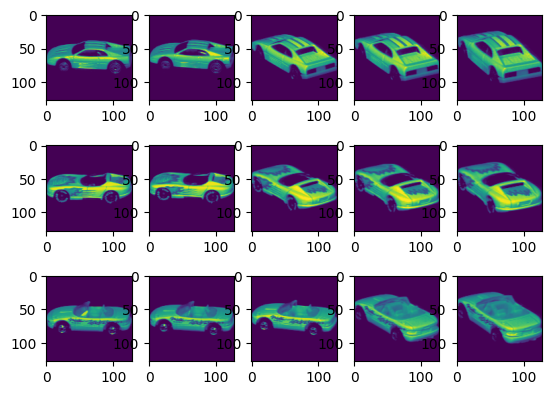

In [9]:
f,ax= plt.subplots(len(labels_used),5)
for i in range(len(labels_used)):
    for j in range(5):
        ax[i,j].imshow(x_im[ np.where(y[:,0]==i)[0][j]].reshape(im_size))

In [10]:
im_size= (128,128)


used_coords = np.where(np.std(x_im,axis=0)>1e-6)[0]
x= x_im[:,used_coords]

In [11]:
x.shape

(216, 16217)

In [12]:
x_svd= SVD_mean_shifted(x,100)

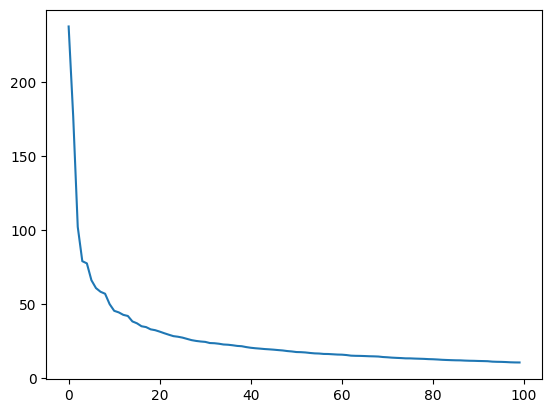

In [13]:
plt.plot(x_svd[1])

# Run code

In [19]:
K=2
perplexity=10
x_svd_new = (x_svd[0][:,:20],x_svd[1][:20], x_svd[2][:20,:])
x_recon = (x_svd[0][:,:20]*x_svd[1][:20])@ x_svd[2][:20,:]

fp = FP(  perplexity=perplexity, K=K)

In [ ]:
fp.fit(x_svd_new, verbose_updates=True, simulations=100,delta_steps=8)


In [21]:
print(fp.get_optimization_summary()['objective_value'])

np.float64(114.76808833020192)

In [22]:
print(fp.get_optimization_summary()['simulation_id'])

2

# embeddings

In [24]:
feat_partitions = fp.get_feature_partitions()

In [26]:
x_tsne_all = TSNE(n_components=2,perplexity=10,method='exact').fit_transform(x_svd_new[0]*x_svd_new[1])
x_tsne_ours= [TSNE(n_components=2, perplexity=[10,10][i],random_state=99,method='exact').fit_transform(x_recon[:,feat_partitions[s]]) for s in range(2)]


72
72
72


Text(0, 0.5, '$\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad$Colored by\n azimuth')

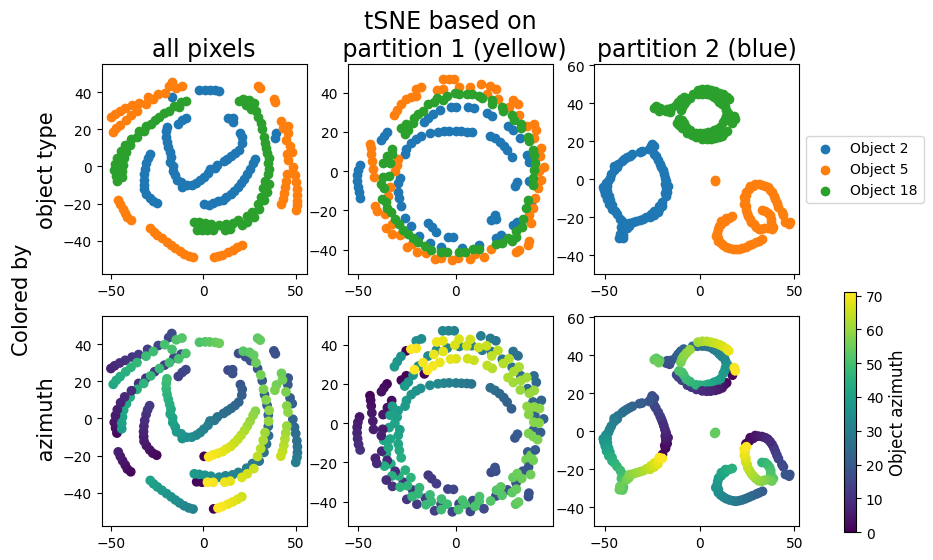

In [27]:
f,ax= plt.subplots(2,3, figsize=(9,6))

for carlabel in np.unique(y[:,0].astype(int)):
    cur_inds= np.where(y[:,0].astype(int)==carlabel)[0]
    print(len(cur_inds))
    ax[0,0].scatter(x_tsne_all[cur_inds,0],x_tsne_all[cur_inds,1],label= 'Object '+str(labels_used[carlabel]))
    for i in range(2):
        ax[0,1+i].scatter(x_tsne_ours[i][cur_inds,0],x_tsne_ours[i][cur_inds,1],label= 'Object '+str(labels_used[carlabel]))

ax[1,0].scatter(x_tsne_all[:,0],x_tsne_all[:,1],c= y[:,1])

for i in range(2):
    im= ax[1,1+i].scatter(x_tsne_parts[i][:,0],x_tsne_parts[i][:,1],c= y[:,1])

for a in ax.flatten():
    a.set_aspect('equal', adjustable="datalim")

ax[0,2].legend()
ax[0, 2].legend(loc="center left", bbox_to_anchor=(1, 0.5))

cbar = f.colorbar(im, ax=ax[1, 2], orientation='vertical',pad=-0.15) 
cbar.set_label("Object azimuth",fontsize=12)
cbar.ax.set_position([.95, 0.1, 0.03, 0.4])  

ax[0,0].set_title('all pixels',fontsize=17)
ax[0,1].set_title('tSNE based on\n partition 1 (yellow)',fontsize=17)
ax[0,2].set_title('partition 2 (blue)',fontsize=17)

ax[0,0].set_ylabel('object type',fontsize=15)
ax[1,0].set_ylabel('$\qquad\qquad\qquad\qquad\qquad\qquad$Colored by\n azimuth',fontsize=15)

In [28]:
x_tsne_all = TSNE(n_components=2,perplexity=20,method='exact').fit_transform(x_pca[0]*x_pca[1])
x_tsne_ours= [TSNE(n_components=2, perplexity=[20,20][i],random_state=99,method='exact').fit_transform(x_recon[:, feat_partitions[s]]) for s in range(2)]


72
72
72


Text(0, 0.5, '$\\qquad\\qquad\\qquad\\qquad\\qquad\\qquad$Colored by\n azimuth')

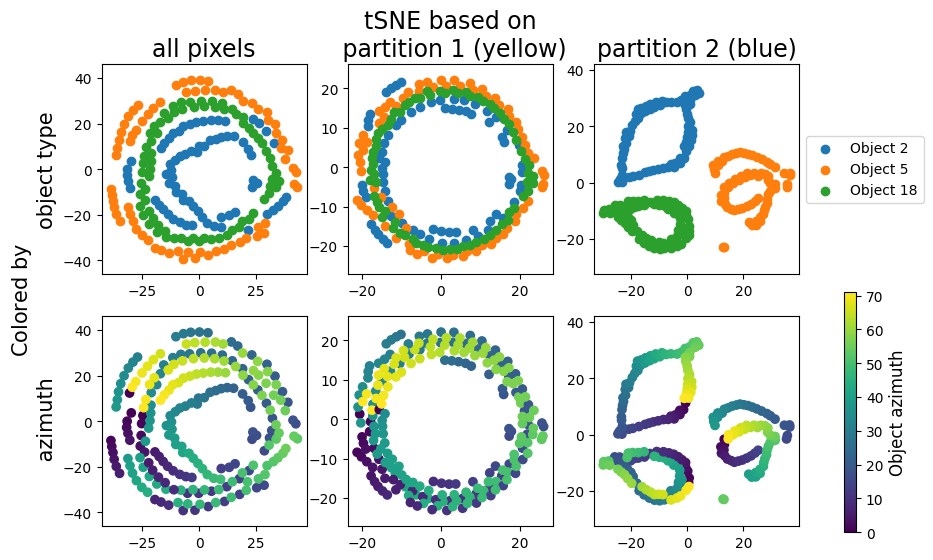

In [29]:
f,ax= plt.subplots(2,3, figsize=(9,6))

for carlabel in np.unique(y[:,0].astype(int)):
    cur_inds= np.where(y[:,0].astype(int)==carlabel)[0]
    print(len(cur_inds))
    ax[0,0].scatter(x_tsne_all[cur_inds,0],x_tsne_all[cur_inds,1],label= 'Object '+str(labels_used[carlabel]))
    for i in range(2):
        ax[0,1+i].scatter(x_tsne_ours[i][cur_inds,0],x_tsne_ours[i][cur_inds,1],label= 'Object '+str(labels_used[carlabel]))

ax[1,0].scatter(x_tsne_all[:,0],x_tsne_all[:,1],c= y[:,1])

for i in range(2):
    im= ax[1,1+i].scatter(x_tsne_ours[i][:,0],x_tsne_ours[i][:,1],c= y[:,1])

for a in ax.flatten():
    a.set_aspect('equal', adjustable="datalim")

ax[0,2].legend()
ax[0, 2].legend(loc="center left", bbox_to_anchor=(1, 0.5))

cbar = f.colorbar(im, ax=ax[1, 2], orientation='vertical',pad=-0.15) 
cbar.set_label("Object azimuth",fontsize=12)
cbar.ax.set_position([.95, 0.1, 0.03, 0.4])  

ax[0,0].set_title('all pixels',fontsize=17)
ax[0,1].set_title('tSNE based on\n partition 1 (yellow)',fontsize=17)
ax[0,2].set_title('partition 2 (blue)',fontsize=17)


ax[0,0].set_ylabel('object type',fontsize=15)
ax[1,0].set_ylabel('$\qquad\qquad\qquad\qquad\qquad\qquad$Colored by\n azimuth',fontsize=15)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0484313725490195].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.05].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.05].


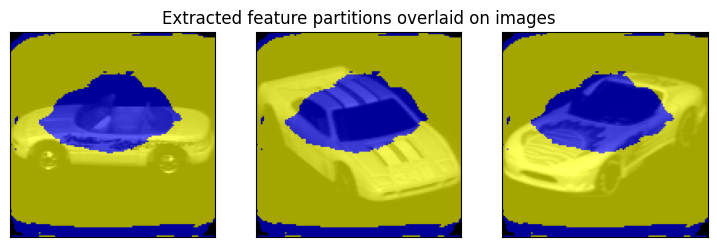

In [34]:
mask= np.zeros( (np.prod(im_size),3))

mask[used_coords[feat_partitions[0]],:2]+=0.65
mask[used_coords[feat_partitions[1]],2]+= .6

f,ax= plt.subplots(1,3,figsize=(9,3))
ax[0].imshow( x_im[0].reshape(im_size)[:,:,None]*.4 +mask.reshape( list(im_size)+[3]))
ax[1].imshow( x_im[115].reshape(im_size)[:,:,None]*.4 +mask.reshape( list(im_size)+[3]))
ax[2].imshow( x_im[201].reshape(im_size)[:,:,None]*.4 +mask.reshape( list(im_size)+[3]))

ax[1].set_title('Extracted feature partitions overlaid on images')
for a in ax:
    a.set_xticks([])  
    a.set_yticks([])  